In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from model import read_data

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_deaths    = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [3]:
confirmed_df = read_data(url_confirmed)
deaths_df    = read_data(url_deaths)
recovered_df = read_data(url_recovered)

In [4]:
deaths_spain_df    = deaths_df['Spain'].loc['20200301':]
confirmed_spain_df = confirmed_df['Spain'].loc['20200301':]
recovered_spain_df = recovered_df['Spain'].loc['20200301':]

# Confirmed

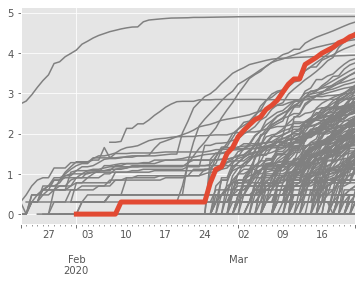

In [5]:
ax = confirmed_df.apply(np.log10).plot(legend=False, c = 'grey')
confirmed_df['Spain'].apply(np.log10).plot(ax = ax, linewidth = 5)

# Deaths

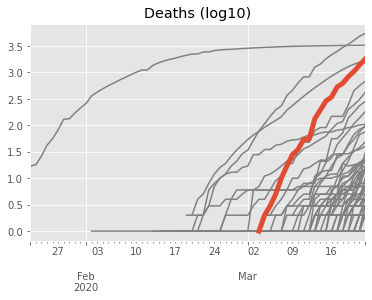

In [6]:
ax = deaths_df.apply(np.log10).plot(legend=False, c = 'grey', title='Deaths (log10)')
deaths_df['Spain'].apply(np.log10).plot(ax = ax, linewidth = 5)

## Total deaths

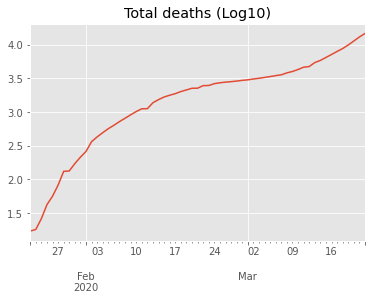

In [7]:
deaths_df.sum(axis=1).apply(np.log10).plot(title='Total deaths (Log10)')

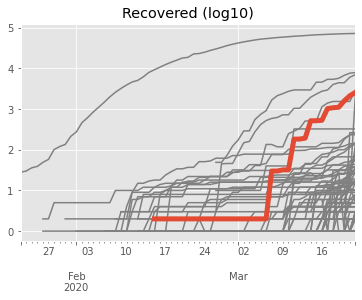

In [8]:
ax = recovered_df.apply(np.log10).plot(legend=False, c = 'grey', title='Recovered (log10)')
recovered_df['Spain'].apply(np.log10).plot(ax = ax, linewidth = 5)

## Ratios with confirmed

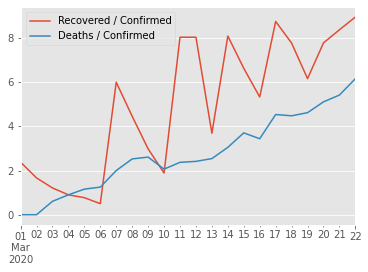

In [9]:
ax = (recovered_spain_df / confirmed_spain_df).mul(100).dropna().plot(label = 'Recovered / Confirmed')
(deaths_spain_df / confirmed_spain_df).dropna().mul(100).plot(ax = ax, label = 'Deaths / Confirmed')
plt.legend()

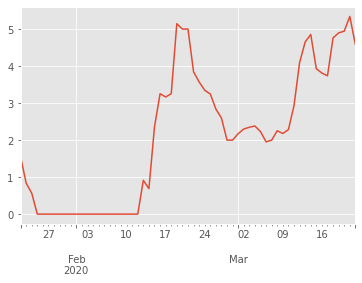

In [10]:
(deaths_df / confirmed_df).dropna(axis=1, how = 'all').quantile(0.9, axis =1).mul(100).plot(legend=False)

In [40]:
EPSILON = 1000

a = (confirmed_df.fillna(0.0).ge(EPSILON)) 

dates_epsilon_ss = a.loc[:, a.any().values].idxmax()

In [41]:
rebalanced_df = pd.DataFrame(index = range(len(confirmed_df.index)))

for country in dates_epsilon_ss.index:
    
    _date = dates_epsilon_ss.loc[country]
    
    rebalanced_df.loc[:, country] = pd.Series(confirmed_df.loc[_date:, country].values).reindex(rebalanced_df.index)

In [42]:
rebalanced_df = rebalanced_df.apply(np.log10)

In [43]:
import plotly.express as px

In [44]:
a = rebalanced_df.reset_index()

px.line(a.melt(id_vars = 'index'), x = 'index', y = 'value', color = 'variable')